<a href="https://colab.research.google.com/github/prcb420/WTG_Fault_Predictor/blob/main/WTG_Fault_Predictor_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow pandas numpy matplotlib scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#data = pd.read_csv('your_data.csv')
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

data = pd.read_csv(fn)

Saving GGM23, GGM107 TML.csv to GGM23, GGM107 TML.csv
User uploaded file "GGM23, GGM107 TML.csv" with length 2305151 bytes


In [ ]:
# Feature Engineering (example)
data['log_datetime'] = pd.to_datetime(data['log_datetime'], format='%d-%m-%Y %H:%M', errors='coerce')  # Specify the correct format
# If you have inconsistent date formats, try:
#data['log_datetime'] = pd.to_datetime(data['log_datetime'], format='%d-%m-%Y %H:%M', errors='coerce')
data['Daily_Avg_Wind_Speed'] = data.groupby(pd.Grouper(key='log_datetime', freq='D'))['Wind_Speed_Avg'].transform('mean')

# Select relevant features
features = ['PowActNet_max', 'PowActNet_avg', 'Reactive_Power_min', 'Wind_Speed_min', 'Wind_Speed_max',
            'Wind_Speed_Avg', 'Produced_Energy', 'Gea_BeaTem1_max', 'Gea_BeaTem1_avg', 'Gea_BeaTem2_max',
            'Gea_BeaTem2_avg', 'Gen_BeaDe_Tem_max', 'Gen_BeaDe_Tem_avg', 'Gen_BeaNde_Tem_max', 'Gen_BeaNde_Tem_avg',
            'Gea_BeaTem3_max', 'Gea_BeaTem3_ave', 'Con_LsclgbTemFilMax_max', 'Con_LsclgbTemFilMax_ave',
            'Con_GsclgbTemFilMax_max', 'Con_GsclgbTemFilMax_ave', 'PlcInf_PowCrvVld_min']


In [ ]:
print(data.columns)
print(features)

Index(['tb_displayname', 'log_datetime', 'log_date', 'tb_name',
       'PowActNet_max', 'PowActNet_avg', 'Reactive_Power_min',
       'Wind_Speed_min', 'Wind_Speed_max', 'Wind_Speed_Avg', 'Produced_Energy',
       'Gea_BeaTem1_max', 'Gea_BeaTem_avg', 'Gea_BeaTem2_max',
       'Gea_BeaTem2_avg', 'Gen_BeaDe_tem_max', 'Gen_BeaDe_Tem_avg',
       'Gen_BeaNdeTem_max', 'Gen_BeaNdeTem_avg', 'Gea_BeaTem3_max',
       'Gea_BeaTem3_ave', 'Con_LscIgbTemFilMax_max', 'Con_LscIgbTemFilMax_ave',
       'Con_GscIgbTemFilMax_max', 'Con_GscIgbTemFilMax_ave',
       'PlcInf_PowCrvVld_min', 'Daily_Avg_Wind_Speed'],
      dtype='object')
['PowActNet_max', 'PowActNet_avg', 'Reactive_Power_min', 'Wind_Speed_min', 'Wind_Speed_max', 'Wind_Speed_Avg', 'Produced_Energy', 'Gea_BeaTem1_max', 'Gea_BeaTem1_avg', 'Gea_BeaTem2_max', 'Gea_BeaTem2_avg', 'Gen_BeaDe_Tem_max', 'Gen_BeaDe_Tem_avg', 'Gen_BeaNde_Tem_max', 'Gen_BeaNde_Tem_avg', 'Gea_BeaTem3_max', 'Gea_BeaTem3_ave', 'Con_LsclgbTemFilMax_max', 'Con_LsclgbTemFilM

In [ ]:
# Check if there are extra spaces using the `str.strip` method

data.columns = data.columns.str.strip()

features = [col.strip() for col in features] # removes leading and trailing spaces
features = [col.replace('_ave', '_avg') for col in features] # example: replacing 'Gea_BeaTem3_ave' with 'Gea_BeaTem3_avg'
features = [col.replace('Gen_BeaNde_Tem_max', 'Gen_BearNde_Tem_max') for col in features] # example: replacing 'Gen_BeaNde_Tem_max' with 'Gen_BearNde_Tem_max'
# Get the common columns in `data` and `features`
common_features = list(set(data.columns) & set(features))
#Redefine features, X, and y to include only available/common_features
X = data[common_features]
y = (data['tb_name'] == 'GGM23').astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=512, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6586 - loss: 0.6298 - val_accuracy: 0.7873 - val_loss: 0.4441
Epoch 2/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7779 - loss: 0.4532 - val_accuracy: 0.8309 - val_loss: 0.3680
Epoch 3/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8188 - loss: 0.3782 - val_accuracy: 0.8594 - val_loss: 0.3312
Epoch 4/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8567 - loss: 0.3211 - val_accuracy: 0.8809 - val_loss: 0.2677
Epoch 5/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8880 - loss: 0.2615 - val_accuracy: 0.9146 - val_loss: 0.2118
Epoch 6/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9238 - loss: 0.2022 - val_accuracy: 0.9454 - val_loss: 0.1724
Epoch 7/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9428 - loss: 0.1650 - val_accuracy: 0.9500 - val_loss: 0.1304
Epoch 8/512
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9593 - loss: 0.1340 - val_acc

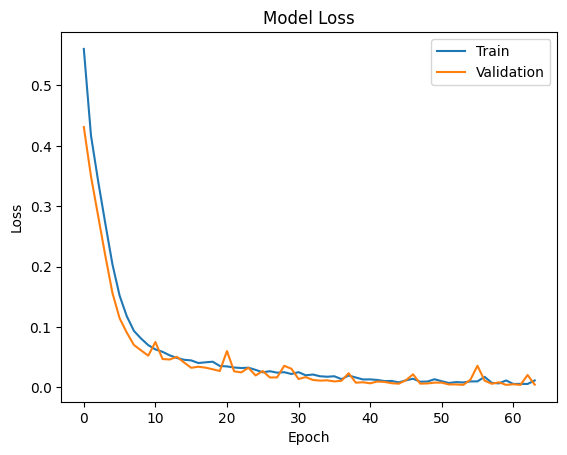

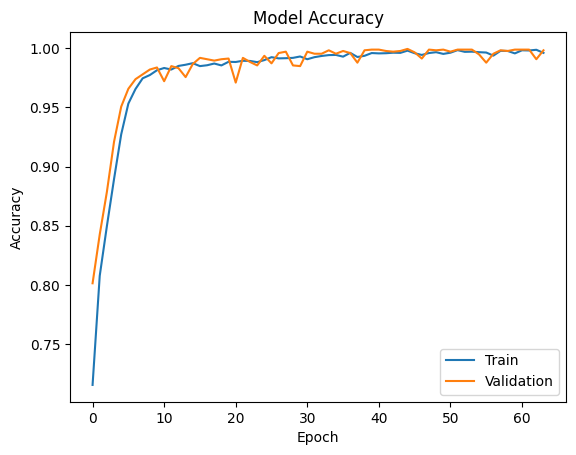

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy and other metrics
# ...

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model.save('wind_turbine_fault_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('wind_turbine_fault_model.h5')

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

new_wtg_data = pd.read_csv(fn)

Saving GGM23, GGM107 TML - Copy.csv to GGM23, GGM107 TML - Copy (1).csv
User uploaded file "GGM23, GGM107 TML - Copy (1).csv" with length 975 bytes


In [ ]:
# Preprocess new data
# Get the common columns in `new_wtg_data` and `features`
common_features = list(set(new_wtg_data.columns) & set(features))

# Apply scaling using only the available/common_features in new_wtg_data
scaler = StandardScaler()
new_wtg_data_scaled = scaler.fit_transform(new_wtg_data[common_features])

# Make predictions using the loaded model and the scaled new data with common features
predictions = loaded_model.predict(new_wtg_data_scaled)

# Classify predictions
predicted_labels = (predictions > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
# Print predictions
print(predicted_labels)

[[0]
 [1]]


In [ ]:
# ... (rest of your code) ...

# Classify predictions
predicted_labels = (predictions > 0.5).astype(int)

# Convert numerical labels to readable labels
readable_labels = []
for label in predicted_labels:
    if label == 1:
        readable_labels.append('GGM23')  # Or a more descriptive name for this class
    else:
        readable_labels.append('Other')   # Or a more descriptive name for the other class

# Print readable predictions
print(readable_labels)

['Other', 'GGM23']
